In [1]:
from keras.models import load_model
from google.colab import files, drive
import cv2
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [0]:
def predict(model, file_name_img, file_name_mask, input_height, input_width,
            n_classes):
    img_test = cv2.imread(file_name_img, 1)
    img_mask = cv2.imread(file_name_mask, 0)
    img_mask = cv2.resize(img_mask, (input_height, input_width),
                          interpolation=cv2.INTER_NEAREST)
    img_test = cv2.resize(img_test, (input_height, input_width),
                          interpolation=cv2.INTER_NEAREST)
    img_test = np.expand_dims(img_test, axis=0)
    mask_pred = model.predict(img_test)
    mask_pred = mask_pred.reshape((input_height, input_width, n_classes)).\
        argmax(axis=2)
    plt.figure(figsize=(32, 32))
    plt.subplot(1, 3, 1)
    plt.imshow(img_test[0])
    plt.subplot(1, 3, 2)
    plt.imshow(img_mask)
    plt.subplot(1, 3, 3)
    plt.imshow(mask_pred)
    plt.show()

In [3]:
drive.mount('/content/gdrive', force_remount=True)
root_path = 'gdrive/My Drive/tabOCR/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
model = load_model(root_path+'outputs/model_best_dominik_column_3_1_adam.hdf5')

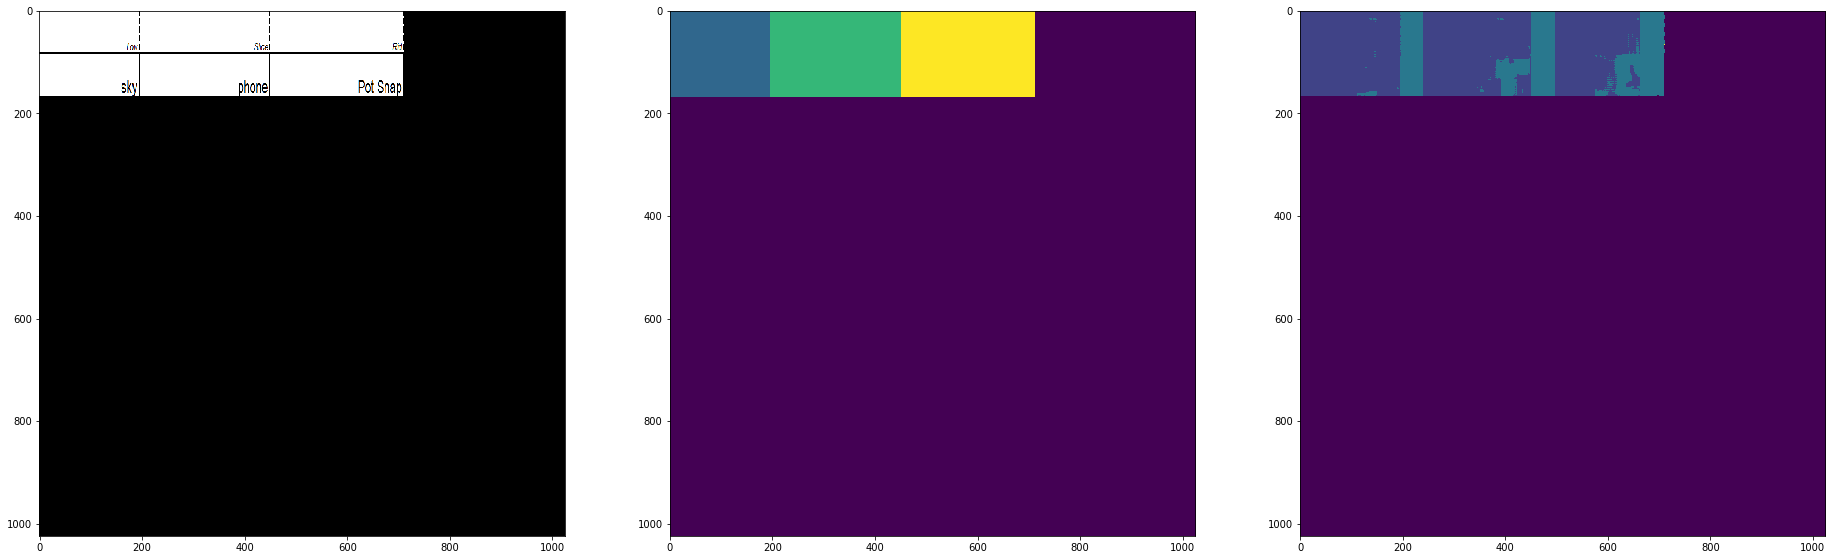

In [11]:
input_height = 1024
input_width = 1024
n_classes = 6
predict(model,
        root_path + "dataset/table_dataset/img_table_test/1_table.png",
        root_path + "dataset/table_dataset/img_mask_column_test/1_table.png",
        input_height, input_width, n_classes)